In [2]:
import numpy as np
from matplotlib import pyplot as plt

/tmp/ipykernel_45127/2420064623.py:16: RuntimeWarning: invalid value encountered in sqrt
  eps * np.sqrt(x[i-1] * (1 - x[i-1])) * eta * np.sqrt(dt))


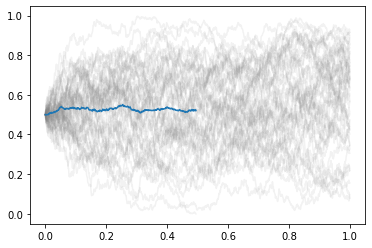

In [6]:
t = np.linspace(0, 1, 1000)
dt = t[1] - t[0]

eps = 0.9
mu = 0.5
x0 = 0.5
s = 1

def generate_beta_process(t, x0, eps, mu, s):
    x = np.zeros(t.shape[0])
    x[0] = x0
    noise = np.random.randn(t.shape[0])
    for i, eta in enumerate(noise[1:], start=1):
        x[i] = (x[i-1] + \
                    s*(mu - x[i-1]) * dt + \
                    eps * np.sqrt(x[i-1] * (1 - x[i-1])) * eta * np.sqrt(dt))
    return x

betas = []
for _ in range(50):
    x = generate_beta_process(t, x0, eps, mu, s)
    betas.append(x)
    plt.plot(t, x, alpha=0.1, color='grey')

beta_mean = np.array(betas).mean(0)
plt.plot(t, beta_mean)


In [ ]:
# from bernoulli process

n = 1000 #number of cells
m = 100 #number of mice




In [8]:
import numpy as np

def solve_fokker_planck(X, T, drift, diffusion, initial_pdf, boundary_conditions):
    """
    Numerically solves the Fokker-Planck equation for a Brownian motion with constant drift using the finite difference method.
    
    Parameters:
    - X: array of discretized position values
    - T: array of discretized time values
    - drift: constant drift coefficient
    - diffusion: constant diffusion coefficient
    - initial_pdf: initial probability density function (PDF) at time T[0]
    - boundary_conditions: tuple containing the left and right boundary conditions for the PDF at all times
    
    Returns:
    - pdf: array of the PDF at all positions and times
    """
    # Get the number of position and time steps
    num_x = len(X)
    num_t = len(T)
    
    # Compute the step sizes for position and time
    dx = X[1] - X[0]
    dt = T[1] - T[0]
    
    # Initialize the PDF array
    pdf = np.zeros((num_x, num_t))
    
    # Set the initial PDF
    pdf[:, 0] = initial_pdf
    
    # Set the boundary conditions
    left_bc, right_bc = boundary_conditions
    
    # Solve the Fokker-Planck equation using the finite difference method
    for t in range(num_t - 1):
        # Set the boundary conditions
        pdf[0, t+1] = left_bc(T[t+1])
        pdf[-1, t+1] = right_bc(T[t+1])
        
        # Compute the values of the PDF at the internal points
        for x in range(1, num_x - 1):
            pdf[x, t+1] = pdf[x, t] + dt * (diffusion * (pdf[x+1, t] - 2 * pdf[x, t] + pdf[x-1, t]) / dx**2
                                            + drift * (pdf[x+1, t] - pdf[x-1, t]) / (2 * dx))
    return pdf

# Test the function with a simple example
X = np.linspace(-5, 5, 100)
T = np.linspace(0, 10, 10)
drift = 0.5
diffusion = 0.01
initial_pdf = np.exp(-X**2)
boundary_conditions = (lambda t: 0, lambda t: 0)

pdf = solve_fokker_planck(X, T, drift, diffusion, initial_pdf, boundary_conditions)

/home/shappiron/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shappiron/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


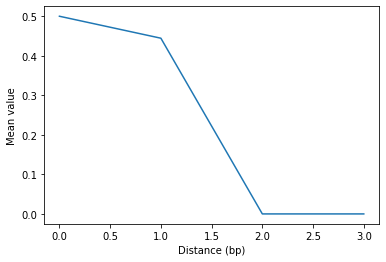

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_scaling_plot(hic_map, max_distance=100000):
    """
    Computes a scaling plot of a Hi-C map.
    
    Parameters:
    - hic_map: 2D array of the Hi-C map
    - max_distance: maximum distance in bp to consider in the plot (default: 100000)
    
    Returns:
    - distances: 1D array of the distances in bp
    - means: 1D array of the mean values at each distance
    """
    # Get the size of the Hi-C map
    num_rows, num_cols = hic_map.shape
    
    # Initialize arrays to store the distances and mean values
    distances = []
    means = []
    
    # Compute the scaling plot
    for distance in range(max_distance):
        # Compute the mean value at the current distance
        mean = np.mean(hic_map[distance:, distance:])
        
        # Store the distance and mean value
        distances.append(distance)
        means.append(mean)
    
    return np.array(distances), np.array(means)

# Test the function with a simple example
hic_map = np.array([[0, 0, 1, 1],
                    [0, 0, 1, 1],
                    [1, 1, 0, 0],
                    [1, 1, 0, 0]])
distances, means = compute_scaling_plot(hic_map)

# Plot the scaling plot
plt.plot(distances, means)
plt.xlabel("Distance (bp)")
plt.ylabel("Mean value")
plt.show()
